<a href="https://colab.research.google.com/github/Raihan-009/FaceRecognition-opencv/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello World!")

Hello World!


**Loading Dataset**

In [2]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
path = '/content/drive/MyDrive/Datasets for FR/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

**Data Pre-processing**

In [4]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject04.happy.gif', 'subject04.sad.gif', 'subject13.glasses.gif', 'subject08.sleepy.gif', 'subject04.wink.gif', 'subject10.surprised.gif', 'subject06.noglasses.gif', 'subject04.centerlight.gif', 'subject04.sleepy.gif', 'subject05.leftlight.gif', 'subject11.normal.gif', 'subject15.glasses.gif', 'subject06.sad.gif', 'subject02.rightlight.gif', 'subject12.surprised.gif', 'subject02.happy.gif', 'subject10.noglasses.gif', 'subject14.surprised.gif', 'subject09.surprised.gif', 'subject03.happy.gif', 'subject07.surprised.gif', 'subject07.noglasses.gif', 'subject13.rightlight.gif', 'subject05.normal.gif', 'subject09.glasses.gif', 'subject15.sleepy.gif', 'subject01.leftlight.gif', 'subject12.happy.gif', 'subject07.sleepy.gif', 'subject08.wink.gif', 'subject13.leftlight.gif', 'subject14.glasses.gif', 'subject14.sleepy.gif', 'subject15.happy.gif', 'subject11.rightlight.gif', 'subject10.glasses.gif', 'subject01.rightlight.gif', 'subject06.wink.gif', 'subject01.glasses.gif', 'subject12.sad.gif',

In [5]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  # print(paths)
  faces = []
  ids = []
  for path in paths:
    # print(path)
    image = Image.open(path).convert('L') ## converting into grayscale image
    # print(type(image))
    image_np = np.array(image, 'uint8')
    # print(type(image_np))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ""))
    # print(id)
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces


In [6]:
ids, faces = get_image_data()

In [14]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

**Recognizing Faces**

In [15]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [29]:
test_image = '/content/yalefaces/test/subject01.gif'
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')

In [30]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(1, 22.62525404335563)

In [31]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ""))
expected_output

1

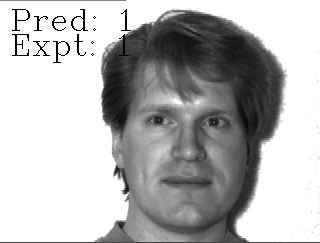

In [32]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0))
cv2.putText(image_np, 'Expt: ' + str(expected_output), (10,55), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0))
cv2_imshow(image_np)